In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [5]:
Title = pd.get_dummies(df['Title'])
Pclass = pd.get_dummies(df['Pclass'],prefix= 'Pclass', prefix_sep='_')
Sex = pd.get_dummies(df['Sex'], drop_first= True)
Embarked = pd.get_dummies(df['Embarked'],prefix= 'Embarked', prefix_sep='_')

In [6]:
df = df.drop(['Pclass', 'Sex', 'Embarked', 'Title'], axis=1)

In [7]:
df = pd.concat([df, Pclass, Sex, Embarked, Title],axis=1)

In [8]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,0,0,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,0,0,0,1,0,0,0,0,0


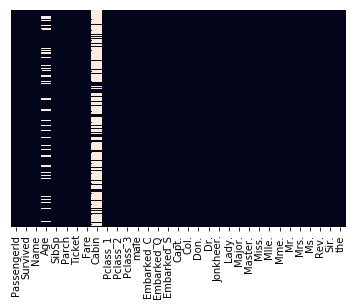

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.20, 
                                                    )

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train[['Fare']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(X_train[['Fare']])

In [16]:
X_train_scaled_feat = pd.DataFrame(scaled_features,columns=['Fare'], index=X_train.index)

In [17]:
X_train_scaled = pd.concat([X_train.drop('Fare', axis = 1), X_train_scaled_feat], axis = 1)

In [18]:
X_train_scaled.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Cabin,Pclass_1,Pclass_2,Pclass_3,...,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the,Fare
596,597,"Leitch, Miss. Jessie Wills",NaN,0,0,248727,NaN,0,1,0,...,1,0,0,0,0,0,0,0,0,0.035423
212,213,"Perkin, Mr. John Henry",22.0,0,0,A/5 21174,NaN,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.535781
53,54,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",29.0,1,0,2926,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,-0.119856
285,286,"Stankovic, Mr. Ivan",33.0,0,0,349239,NaN,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.504448
461,462,"Morley, Mr. William",34.0,0,0,364506,NaN,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.518034


In [19]:
X_train_scaled = X_train_scaled.drop(['Age', 'Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
logmodel = LogisticRegressionCV(cv=3,
                                penalty='l2',
                                scoring='accuracy',
                                n_jobs=-1,
                                class_weight='balanced').fit(X_train_scaled, y_train)

In [22]:
logmodel.score(X_train_scaled, y_train)

0.8216292134831461

In [23]:
scaled_test_features = scaler.transform(X_test[['Fare']]) 

In [24]:
X_test_scaled_feat = pd.DataFrame(scaled_test_features,columns=['Fare'], index=X_test.index)

In [25]:
X_test_scaled = pd.concat([X_test.drop('Fare', axis = 1), X_test_scaled_feat], axis = 1)

In [27]:
X_test_scaled = X_test_scaled.drop(['Age', 'Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)

In [28]:
logmodel.score(X_test_scaled, y_test)

0.8100558659217877

In [36]:
df_test = pd.read_csv('test.csv')

In [37]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
Title = pd.get_dummies(df_test['Title'])
Pclass = pd.get_dummies(df_test['Pclass'],prefix= 'Pclass', prefix_sep='_')
Sex = pd.get_dummies(df_test['Sex'], drop_first= True)
Embarked = pd.get_dummies(df_test['Embarked'],prefix= 'Embarked', prefix_sep='_')

In [42]:
df_test = df_test.drop(['Pclass', 'Sex', 'Embarked', 'Title'], axis=1)

In [43]:
df_test = pd.concat([df_test, Pclass, Sex, Embarked, Title],axis=1)

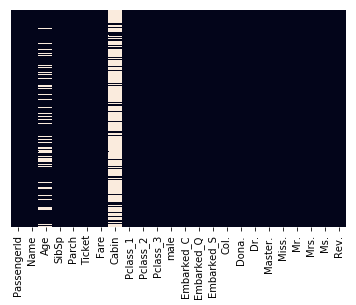

In [44]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [49]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [51]:
df_test['Fare'][df_test['Fare'].isnull()] = df_test['Fare'].mean()

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
scaled_test_features = scaler.transform(df_test[['Fare']]) 

In [54]:
test_scaled_features= pd.DataFrame(scaled_test_features,columns=['Fare'], index=df_test.index)

In [55]:
df_test_scaled = pd.concat([df_test.drop('Fare', axis = 1),test_scaled_features], axis = 1)

In [56]:
df_test_scaled = df_test_scaled.drop(['Age', 'Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)

In [59]:
df_test_scaled.columns

Index(['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Col.', 'Dona.', 'Dr.',
       'Master.', 'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Fare'],
      dtype='object')

In [61]:
X_train_scaled.columns

Index(['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Capt.', 'Col.', 'Don.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'Fare'],
      dtype='object')

In [71]:
new_cols = list(set(X_train_scaled) - set(df_test_scaled))

In [72]:
for col in new_cols:
    df_test_scaled[col] = 0
    

In [73]:
drop_cols = list(set(df_test_scaled) - set(X_train_scaled))

In [74]:
drop_cols

['Dona.']

In [76]:
logmodel.predict(df_test_scaled.drop('Dona.', axis =1)[X_train_scaled.columns])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
submission = df_test[['PassengerId']]

In [80]:
submission['Survived'] = logmodel.predict(df_test_scaled.drop('Dona.', axis =1)[X_train_scaled.columns])

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
submission.to_csv('submission.csv', index = False)